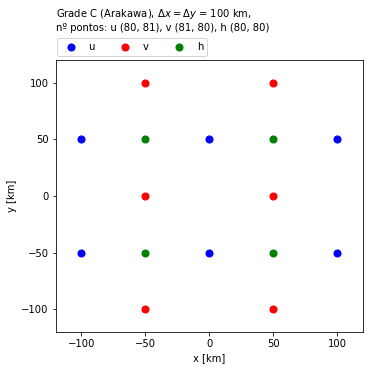

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as imageio
from functions import *
import os


Xu, Yu, Xv, Yv, Xh, Yh, dx, dy = plot_gridC()



# Leapfrog

## Test with H

Time: 	1.00 hours
Step: 	60 / 7200
Mass: 	0.000

Time: 	2.00 hours
Step: 	120 / 7200
Mass: 	0.000

Time: 	3.00 hours
Step: 	180 / 7200
Mass: 	0.000

Time: 	4.00 hours
Step: 	240 / 7200
Mass: 	0.000

Time: 	5.00 hours
Step: 	300 / 7200
Mass: 	0.001

Time: 	6.00 hours
Step: 	360 / 7200
Mass: 	0.002

Time: 	7.00 hours
Step: 	420 / 7200
Mass: 	0.006

Time: 	8.00 hours
Step: 	480 / 7200
Mass: 	0.017

Time: 	9.00 hours
Step: 	540 / 7200
Mass: 	0.045

Time: 	10.00 hours
Step: 	600 / 7200
Mass: 	0.117

Time: 	11.00 hours
Step: 	660 / 7200
Mass: 	0.285

Time: 	12.00 hours
Step: 	720 / 7200
Mass: 	0.656

Time: 	13.00 hours
Step: 	780 / 7200
Mass: 	1.431

Time: 	14.00 hours
Step: 	840 / 7200
Mass: 	2.960

Time: 	15.00 hours
Step: 	900 / 7200
Mass: 	5.811

Time: 	16.00 hours
Step: 	960 / 7200
Mass: 	10.841

Time: 	17.00 hours
Step: 	1020 / 7200
Mass: 	19.253

Time: 	18.00 hours
Step: 	1080 / 7200
Mass: 	32.600

Time: 	19.00 hours
Step: 	1140 / 7200
Mass: 	52.720

Time: 	20.00 hours
Step: 	1200 / 7

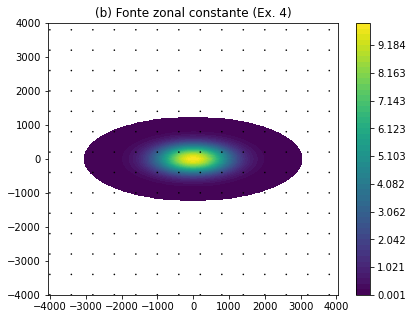

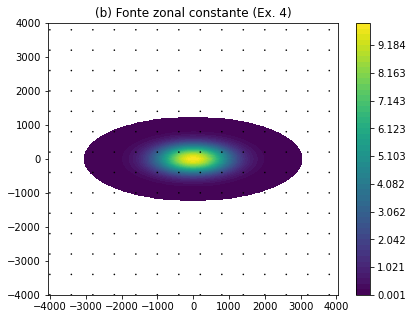

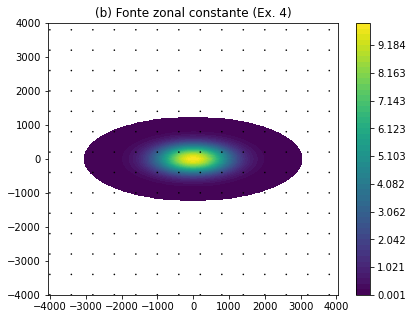

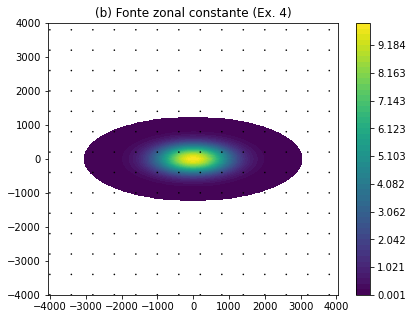

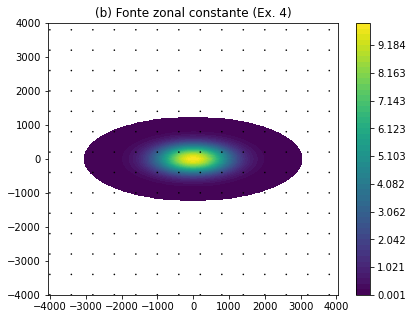

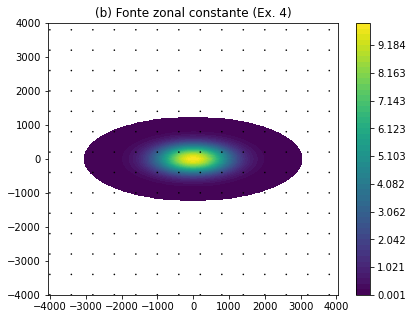

In [3]:
"""
scen1: f=0
scen2: f at -20 degrees as latitude
scen3: beta variation between -4000 to 4000
"""
cenarios = ['scen1', 'scen2', 'scen3']
test = False
Nt, dt = 5*24*60, 60
interval = 60
H = 250
npassos = Nt/interval
# Three scenarios
data = {'nf': {}, 'ft':{}}
log =  {'nf': [False, False], 
        'ft': [True, False]
        }

for k, [f_time, f_space] in log.items():
    for scen in cenarios:
                
        data[k][scen] = swe_leapfrog(scen, Xu, Yu, Xv, Yv, Xh, Yh, dx, dy,
                                f_time = f_time, 
                                f_space= f_space,
                                gamma = 0.1, 
                                sample_interval=interval,
                                H = H,
                                splot=True, 
                                amp = 10,
                                Nt=Nt, dt=dt, test=test)
        
        # animation(scen, Xh, Yh, data[k][scen], H, 
        #             test=test, f_time = f_time, f_space= f_space,
        #             arr1= 0.001, arr2=0.001, arr3=0.001)
    
    

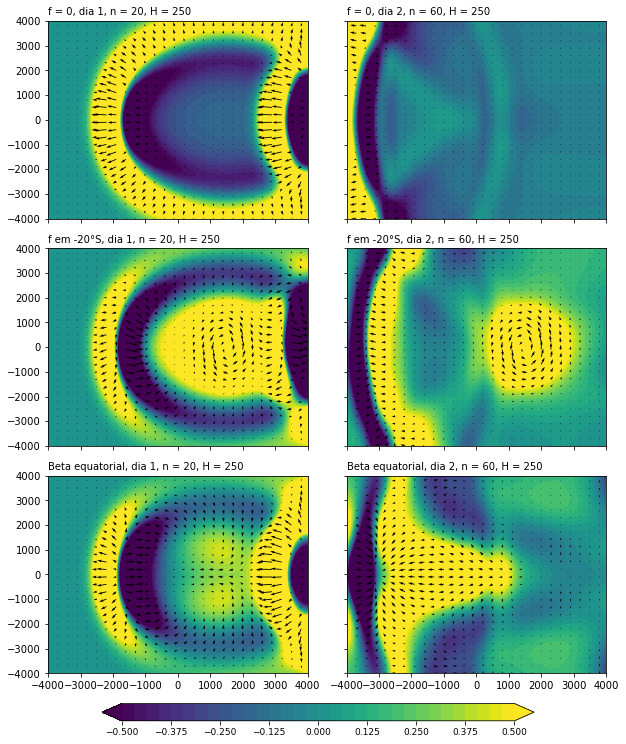

In [19]:
staged_u = np.zeros(Xh.shape)
staged_v = np.zeros(Xh.shape)
width=30; pts=3; lv1=.5; lv2=.5; lv3=.5; lv_div = 5*1e-7; lv_vor = 1e-5;
arr1=0.001; arr2=0.001; arr3=0.001; arr_div_amp = 1; arr_vor_amp = 1
lvs1 = list(np.linspace(-lv1, lv1, 16*2+1))
lvs2 = list(np.linspace(-lv2, lv2, 16*2+1))
lvs3 = list(np.linspace(-lv3, lv3, 16*2+1))
lvs = {'scen1': lvs1, 'scen2':lvs2, 'scen3':lvs3}

arrows = {'scen1': arr1, 'scen2':arr2, 'scen3':arr3}
titles = ['f = 0', 'f = 0', 'f em -20°S', 'f em -20°S', 'Beta equatorial', 'Beta equatorial']
nidx = int(npassos/2)

nidxs = [int(nidx/3), nidx, int(nidx/3), nidx, int(nidx/3),   nidx ]
cenarios_2 = ['scen1', 'scen1', 'scen2', 'scen2', 'scen3', 'scen3']
    
fig, axes = plt.subplots(3,2, figsize=(10,12), sharex=True, sharey=True, gridspec_kw={'wspace':0.15, 'hspace':0.15} )
for ax, scen, tit, nidx in zip(axes.flatten(), cenarios_2, titles, nidxs):
    
    im = ax.contourf(Xh/1000, Yh/1000, data['nf'][scen]['h'][nidx], levels=lvs[scen], extend='both') #cmap=plt.cm.RdBu_r
    #cbar = fig.colorbar(im, ax=ax, orientation="vertical")
    #cbar.ax.set_ylabel('h [m]', fontsize=8)
    u, v = data['nf'][scen]['u'][nidx], data['nf'][scen]['v'][nidx]
    staged_u[ :, :] = (u[ :, 1:] + u[ :, :-1]) * 0.5
    staged_v[ :, :] = (v[ 1:, :] + v[:-1, :]) * 0.5
    Q = ax.quiver(Xh[::pts, ::pts]/1000, Yh[::pts, ::pts]/1000, staged_u[::pts, ::pts], staged_v[::pts, ::pts],
        units = "xy", scale = arrows[scen], width = width)
    #ax.quiver(-3000,3000,1,0,scale=20,width=width)
    ax.set_xlim(-4000, 4000)
    ax.set_ylim(-4000, 4000)
    #qk = ax.quiverkey(Q, 0.9, 0.8, 1000, "0.1 m/s", labelpos = "E", coordinates = "figure")
    ax.set_title(tit+", dia {:.0f}, n = {:.0f}, H = {:.0f}".format(data['nf'][scen]['t'][nidx]/(3600*24), nidx, H), fontsize=10, loc='left')
cax = fig.add_axes([.2,.07,0.6,.02]) # left, bottom, width, height
cbar = fig.colorbar(im, cax=cax, orientation='horizontal') # pad, shrink
cbar.ax.tick_params(labelsize=9)
if test == True:
    fig.savefig("fig/leapfrog_test_"+str(H)+"m_cenarios.png", dpi = 300, bbox_inches='tight', facecolor='w')
    
else:
    fig.savefig("fig/leapfrog_"+str(H)+"m_cenarios.png", dpi = 300, bbox_inches='tight', facecolor='w')

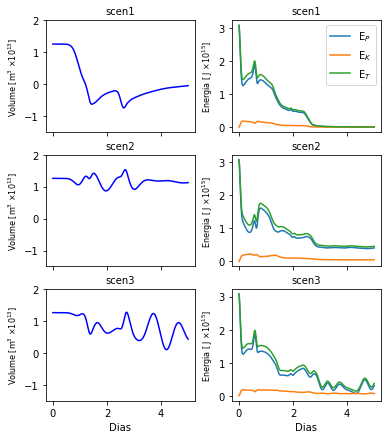

In [21]:
t = np.linspace(0, Nt*dt/(24*3600), Nt-1)
fig, axes = plt.subplots(3, 2, figsize=(6, 7), sharex=True,
                         gridspec_kw={'wspace':0.25})

# Massa
for ax, scen in zip([axes[0,0], axes[1,0], axes[2,0]], cenarios):
    ax.plot(t, data['nf'][scen]['m']/1e13, c='b')
    ax.set_title(scen, fontsize=10, loc='center')
    #ax.set_yscale("log")
    ax.set_ylim(-1.5,2)
    ax.ticklabel_format(style='sci', axis='y', scilimits=(-10,10))
    ax.set_ylabel("Volume [m$^3$ $\\times 10^{13}$]", fontsize=8)

axes[2,0].set_xlabel('Dias')
    
# Energia
for ax, scen in zip([axes[0,1], axes[1,1], axes[2,1]], cenarios):
    Ep, Ek = data['nf'][scen]['ep']/1e14, data['nf'][scen]['ek']/1e15
    Et = Ep + Ek
    ax.plot(t, Ep, label='E$_P$')
    ax.plot(t, Ek, label='E$_K$')
    ax.plot(t, Et, label='E$_T$')
    #ax.set_yscale("log")
    ax.set_title(scen, fontsize=10, loc='center')
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    ax.set_ylabel("Energia [ J $\\times 10^{15}$]", fontsize=8)

axes[2,1].set_xlabel('Dias')
axes[0,1].legend()

if test == True:
    fig.savefig("fig/lf_vol_ener_test"+str(H)+"m_.png", dpi = 300, bbox_inches='tight', facecolor='w')

else:
    fig.savefig("fig/lf_vol_ener"+str(H)+"m_.png", dpi = 300, bbox_inches='tight', facecolor='w')

## Fonte de momento zonal constante (vento forçante de leste)
Use CF radiacional na fronteira oeste, norte e sul e CF rígida na fronteira leste.  Use H = 1m (sim, um metro!).  Integre até que a onda que vai para leste atinja a costa e comece a refletir para o centro da grade.  Como vai demorar muito tempo, faça os testes do modelo com H = 250m . Só depois que vc tiver removido todas as “funcionalidades não documentadas” do modelo (i.,e, os “bugs”), faça uma integração com o H mais realista.

Time: 	1.00 hours
Step: 	60 / 14400
Mass: 	0.000

Time: 	2.00 hours
Step: 	120 / 14400
Mass: 	0.000

Time: 	3.00 hours
Step: 	180 / 14400
Mass: 	0.000

Time: 	4.00 hours
Step: 	240 / 14400
Mass: 	0.000

Time: 	5.00 hours
Step: 	300 / 14400
Mass: 	0.000

Time: 	6.00 hours
Step: 	360 / 14400
Mass: 	0.000

Time: 	7.00 hours
Step: 	420 / 14400
Mass: 	0.000

Time: 	8.00 hours
Step: 	480 / 14400
Mass: 	0.000

Time: 	9.00 hours
Step: 	540 / 14400
Mass: 	0.000

Time: 	10.00 hours
Step: 	600 / 14400
Mass: 	0.000

Time: 	11.00 hours
Step: 	660 / 14400
Mass: 	0.000

Time: 	12.00 hours
Step: 	720 / 14400
Mass: 	0.000

Time: 	13.00 hours
Step: 	780 / 14400
Mass: 	0.000

Time: 	14.00 hours
Step: 	840 / 14400
Mass: 	0.000

Time: 	15.00 hours
Step: 	900 / 14400
Mass: 	0.000

Time: 	16.00 hours
Step: 	960 / 14400
Mass: 	0.000

Time: 	17.00 hours
Step: 	1020 / 14400
Mass: 	0.000

Time: 	18.00 hours
Step: 	1080 / 14400
Mass: 	0.000

Time: 	19.00 hours
Step: 	1140 / 14400
Mass: 	0.000

Time: 	20.00 hours


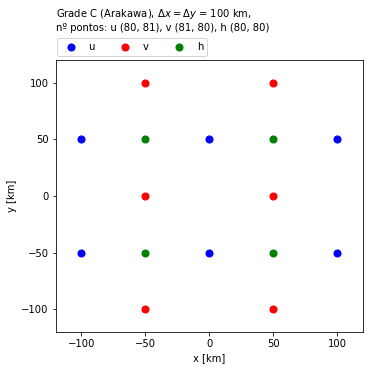

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as imageio
from functions import *
import os

Xu, Yu, Xv, Yv, Xh, Yh, dx, dy = plot_gridC()

"""
scen1: f=0
scen2: f at -20 degrees as latitude
scen3: beta variation between -4000 to 4000
"""
cenarios = ['scen1', 'scen2', 'scen3']
test = False
Nt, dt = 10*24*60, 60
interval = 60
H = 10
npassos = Nt/interval
# Three scenarios
data = {'nf': {}, 'ft':{}}
log =  {'nf': [False, False], 
        'ft': [True, False]
        }

for k, [f_time, f_space] in log.items():
    for scen in cenarios:
                
        data[k][scen] = swe_leapfrog(scen, Xu, Yu, Xv, Yv, Xh, Yh, dx, dy,
                                f_time = f_time, 
                                f_space= f_space,
                                gamma = 0.1, 
                                sample_interval=interval,
                                H = H,
                                splot=False, 
                                amp = 1,
                                Nt=Nt, dt=dt, test=test)
        
        animation(scen, Xh, Yh, data[k][scen], H, 
                    test=test, f_time = f_time, f_space= f_space,
                    arr1= 0.001, arr2=0.001, arr3=0.001)

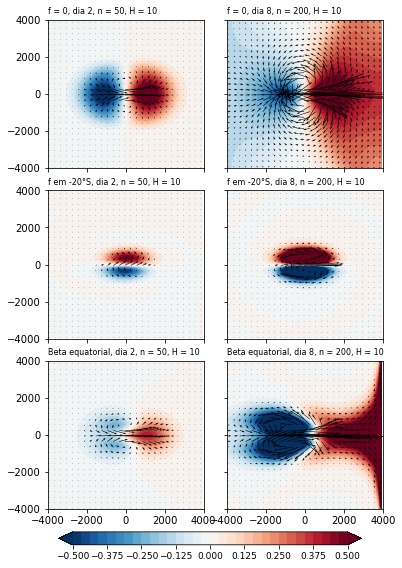

In [15]:
staged_u = np.zeros(Xh.shape)
staged_v = np.zeros(Xh.shape)
width=30; pts=3; lv1=.2; lv2=.5; lv3=.5; lv_div = 5*1e-7; lv_vor = 1e-5;
arr1=0.001; arr2=0.001; arr3=0.001; arr_div_amp = 1; arr_vor_amp = 1
lvs1 = list(np.linspace(-lv1, lv1, 16*2+1))
lvs2 = list(np.linspace(-lv2, lv2, 16*2+1))
lvs3 = list(np.linspace(-lv3, lv3, 16*2+1))
lvs = {'scen1': lvs1, 'scen2':lvs2, 'scen3':lvs3}

arrows = {'scen1': arr1, 'scen2':arr2, 'scen3':arr3}
titles = ['f = 0', 'f = 0', 'f em -20°S', 'f em -20°S', 'Beta equatorial', 'Beta equatorial']

nidxs = [50,  200, 50, 200, 50, 200]
cenarios_2 = ['scen1', 'scen1', 'scen2', 'scen2', 'scen3', 'scen3']
    
fig, axes = plt.subplots(3,2, figsize=(6,9), sharex=True, sharey=True, gridspec_kw={'wspace':0.15, 'hspace':0.15} )
for ax, scen, tit, nidx in zip(axes.flatten(), cenarios_2, titles, nidxs):
    
    im = ax.contourf(Xh/1000, Yh/1000, data['nf'][scen]['h'][nidx],
                     levels=lvs[scen], cmap=plt.cm.RdBu_r, extend='both') #cmap=plt.cm.RdBu_r
    #cbar = fig.colorbar(im, ax=ax, orientation="vertical")
    #cbar.ax.set_ylabel('h [m]', fontsize=8)
    u, v = data['nf'][scen]['u'][nidx], data['nf'][scen]['v'][nidx]
    staged_u[ :, :] = (u[ :, 1:] + u[ :, :-1]) * 0.5
    staged_v[ :, :] = (v[ 1:, :] + v[:-1, :]) * 0.5
    Q = ax.quiver(Xh[::pts, ::pts]/1000, Yh[::pts, ::pts]/1000, staged_u[::pts, ::pts], staged_v[::pts, ::pts],
        units = "xy", scale = arrows[scen], width = width)
    #ax.quiver(-3000,3000,1,0,scale=20,width=width)
    ax.set_xlim(-4000, 4000)
    ax.set_ylim(-4000, 4000)
    #qk = ax.quiverkey(Q, 0.9, 0.8, 1000, "0.1 m/s", labelpos = "E", coordinates = "figure")
    ax.set_title(tit+", dia {:.0f}, n = {:.0f}, H = {:.0f}".format(data['nf'][scen]['t'][nidx]/(3600*24), nidx, H), fontsize=8, loc='left')
cax = fig.add_axes([.15,.07,0.7,.02]) # left, bottom, width, height
cbar = fig.colorbar(im, cax=cax, orientation='horizontal') # pad, shrink
cbar.ax.tick_params(labelsize=9)
if test == True:
    fig.savefig("fig/leapfrog_test_"+str(H)+"m_cenarios.png", dpi = 300, bbox_inches='tight', facecolor='w')
    
else:
    fig.savefig("fig/lf_"+str(H)+"m_cenarios.png", dpi = 300, bbox_inches='tight', facecolor='w')

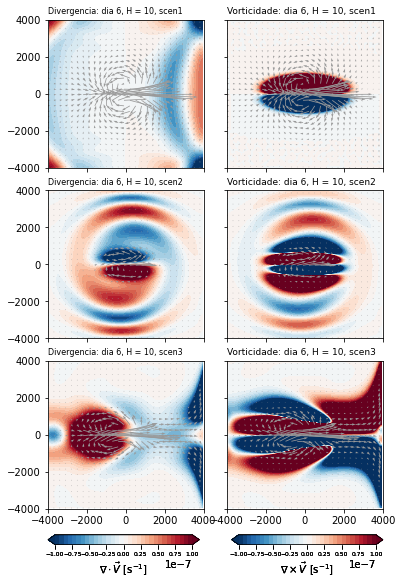

In [16]:
nidx = 150
lvs1 = list(np.linspace(-1e-7, 1e-7, 2*16+1))
lvs2 = list(np.linspace(-1e-7, 1e-7, 2*16+1))
arr_div_amp = 1.2
arr_vor_amp = 1.2
pts = 3

fig, axes = plt.subplots(3,2, figsize=(6,9), sharex=True, sharey=True, gridspec_kw={'wspace':0.15, 'hspace':0.15} )

# Divergencia
# -----------
for ax, scen in zip([axes[0,0], axes[1,0], axes[2,0]], cenarios):
    im = ax.contourf(Xh/1000,Yh/1000, data['nf'][scen]['div'][nidx], levels=lvs1, cmap=plt.cm.RdBu_r,  extend='both') #,
    #cbar = fig.colorbar(im, ax=ax, orientation="vertical")
    # u, v = data[scen]['u'], data[scen]['v']
    # staged_u[:, :, :] = (u[:, 1:, :] + u[:, :-1, :]) * 0.5
    # staged_v[:, :, :] = (v[:, :, 1:] + v[:, :, :-1]) * 0.5
    Q = ax.quiver(Xu[::pts, ::pts]/1000, Yu[::pts, ::pts]/1000, 
                data['nf'][scen]['u'][nidx][::pts, ::pts], data['nf'][scen]['v'][nidx][::pts, ::pts],
                units = "xy", scale = arrows[scen]*arr_div_amp, width=40, color ='.6')
    #qk = ax.quiverkey(Q, 0.9, 0.8, 1000, "0.1 m/s", labelpos = "E", coordinates = "figure")
    ax.set_xlim(-4000, 4000)
    ax.set_ylim(-4000, 4000)
    ax.set_title("Divergencia: dia {:.0f}, H = {:.0f}, ".format(data['nf'][scen]['t'][nidx]/(3600*24),  H)+scen, fontsize=8, loc='left')
    cax = fig.add_axes([.125,.07,0.35,.015]) # left, bottom, width, height
    cbar = fig.colorbar(im, cax=cax, orientation='horizontal') # pad, shrink
    cbar.ax.tick_params(labelsize=6)
    cbar.ax.set_xlabel('$\\nabla \\cdot \\vec{V}$'+' [s$^{-1}$]')
    
# Vorticidade
# -----------
for ax, scen in zip([axes[0,1], axes[1,1], axes[2,1]], cenarios):
    im = ax.contourf(Xh/1000,Yh/1000, data['nf'][scen]['vor'][nidx], 
                     levels=lvs2, cmap=plt.cm.RdBu_r,  extend='both') #levels=lvs,
    #cbar = fig.colorbar(im, ax=ax, orientation="vertical")
    Q = ax.quiver(Xu[::pts, ::pts]/1000, Yu[::pts, ::pts]/1000, 
                data['nf'][scen]['u'][nidx][::pts, ::pts], data['nf'][scen]['v'][nidx][::pts, ::pts],
                units = "xy", scale = arrows[scen]*arr_vor_amp,width=40, color='0.6')
    #qk = ax.quiverkey(Q, 0.9, 0.8, 1000, "0.1 m/s", labelpos = "E", coordinates = "figure")
    ax.set_xlim(-4000, 4000)
    ax.set_ylim(-4000, 4000)
    ax.set_title("Vorticidade: dia {:.0f}, H = {:.0f}, ".format(data['nf'][scen]['t'][nidx]/(3600*24),  H)+scen, fontsize=9, loc='left')
    cax = fig.add_axes([.55,.07,0.35,.015]) # left, bottom, width, height
    cbar = fig.colorbar(im, cax=cax, orientation='horizontal') # pad, shrink
    cbar.ax.tick_params(labelsize=6)
    cbar.ax.set_xlabel('$\\nabla \\times \\vec{V}$'+' [s$^{-1}$]')

if test == True:
    fig.savefig("fig/leapfrog_test_div_vor"+str(H)+"m_"+scen+".png", dpi = 300, bbox_inches='tight', facecolor='w')
else:
    fig.savefig("fig/lf_div_vor"+str(H)+"m_"+scen+".png", dpi = 300, bbox_inches='tight', facecolor='w')

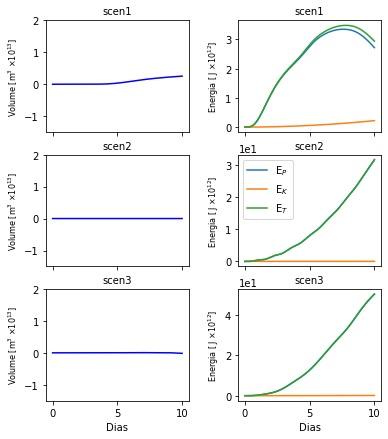

In [3]:
t = np.linspace(0, Nt*dt/(24*3600), Nt-1)
fig, axes = plt.subplots(3, 2, figsize=(6, 7), sharex=True,
                         gridspec_kw={'wspace':0.35})

# Massa
for ax, scen in zip([axes[0,0], axes[1,0], axes[2,0]], cenarios):
    ax.plot(t, data['nf'][scen]['m']/1e13, c='b')
    ax.set_title(scen, fontsize=10, loc='center')
    #ax.set_yscale("log")
    ax.set_ylim(-1.5,2)
    ax.ticklabel_format(style='sci', axis='y', scilimits=(-10,10))
    ax.set_ylabel("Volume [m$^3$ $\\times 10^{13}$]", fontsize=8)

axes[2,0].set_xlabel('Dias')
    
# Energia
for ax, scen in zip([axes[0,1], axes[1,1], axes[2,1]], cenarios):
    Ep, Ek = data['nf'][scen]['ep']/1e12, data['nf'][scen]['ek']/1e15
    Et = Ep + Ek
    ax.plot(t, Ep, label='E$_P$')
    ax.plot(t, Ek, label='E$_K$')
    ax.plot(t, Et, label='E$_T$')
    #ax.set_yscale("log")
    ax.set_title(scen, fontsize=10, loc='center')
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    ax.set_ylabel("Energia [ J $\\times 10^{12}$]", fontsize=8)

axes[2,1].set_xlabel('Dias')
axes[1,1].legend()

if test == True:
    fig.savefig("fig/lf_vol_ener_test"+str(H)+"m.png", dpi = 300, bbox_inches='tight', facecolor='w')

else:
    fig.savefig("fig/lf_vol_ener"+str(H)+"m.png", dpi = 300, bbox_inches='tight', facecolor='w')

# Lax-Wendroff

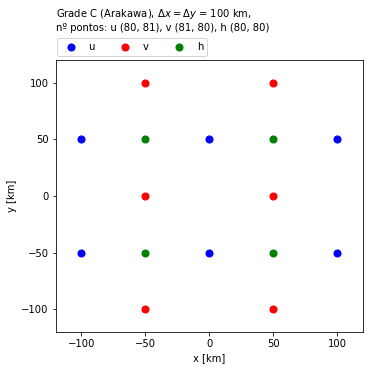

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as imageio
from functions import *
import os


Xu, Yu, Xv, Yv, Xh, Yh, dx, dy = plot_gridC()

In [2]:
Nt, dt = 3*24*60, 60
H = 250
Nx, Ny = Xh.shape
q = 2*np.pi/86400      # angular velocity (2pi/(24*3600 s)) [1/s]
a = 6371000            # Earth radius [m]
g = 9.8                # m/s^2 (gravity acceleration)
c = np.sqrt(g*H)       # Phase velocity [m/s]
scen = 'scen1'

if scen == 'scen1':
    f = 0
    fu = f*Yu
    fv = f*Yv
elif scen == 'scen2':
    f = 2*q*np.sin(np.deg2rad(-20))
    fu = np.ones(Yu.shape)*f
    fv = np.ones(Yv.shape)*f
else:
    beta = 2*q*np.cos(np.deg2rad(0))/a        # Plano Beta equatorial     
    fu = beta*Yu
    fv = beta*Yv

Fh = 10*np.exp(-(Xh - 15*dx)**2/(4*dx)**2 - Yh**2/(10*dy)**2)
Fu = 0*np.exp(-Xu**2/(10*dx)**2 - Yu**2/(4*dy)**2)/(24*3600)

# We define initial conditions and variables
""" time definitions
<var>nm   (n+1/2)
<var>n    ( n )
<var>np1  (n+1) 
"""
unm, vnm, hnm = np.zeros(Xu.shape), np.zeros(Xv.shape), np.zeros(Xh.shape)
un, vn, hn = unm.copy(), vnm.copy(), hnm.copy()
unp1, vnp1, hnp1 = unm.copy(), vnm.copy(), hnm.copy()

# Loop simulation Lax-Wendroff ----------------------------------------------------------------------#
# ---------------------------------------------------------------------------------------------------#
t_0 = time.perf_counter() # timing computation loop
# Sampling variables each sample_interval
sample_interval = 1*60                              # min
h_lst = list(); u_lst = list(); v_lst = list()      # h, u, v sampling
div_lst = list() ; vor_lst = list()                 # divergence and vorticity
t_lst  = [0]                                        # sampling time
mass   = np.array([])                               # mass conservation
en_k   = np.array([])                               # kinetic energy
en_p   = np.array([])                               # potential energy
enst   = np.array([])                               # enstrophy energy

h_lst.append(hn)
u_lst.append(un)
v_lst.append(vn)

un += Fu
hn += Fh

time_step = 1

while (time_step < Nt):
    # nm = n + 1/2 ---------------------------------------------------------------------
    unm[:, 1:-1] = un[:, 1:-1] + 1/2*dt*(-g *(hn[:  , 1:] - hn[: , :-1])/dx +
                                         1/4*((vn*fv)[1: , :-1] + (vn*fv)[1:  , 1: ] +
                                              (vn*fv)[:-1,  1:] + (vn*fv)[:-1 , :-1]) +
                                         Fu[:, 1:-1])
    
    vnm[1:-1, :] = vn[1:-1, :] + 1/2*dt*(-g *(hn[1:, :] - hn[:-1, :])/dy -
                                         1/4*((un*fu)[:-1, 1:] + (un*fu)[1:, 1:] +
                                              (un*fu)[1:, :-1] + (un*fu)[:-1, :-1]))
        
    hnm[:, :] = hn[:, :] - 1/2*dt*H*((un[:, 1:] - un[:  , :-1])/dx +
                                     (vn[1:, :] - vn[:-1, :  ])/dy)

    # np1 = n + 1 ---------------------------------------------------------------------
    unp1[:, 1:-1] = un[:, 1:-1] + dt*(-g *(hnm[:  , 1:] - hnm[: , :-1])/dx +
                                      1/4*((vnm*fv)[1: , :-1] + (vnm*fv)[1:  , 1: ] +
                                           (vnm*fv)[:-1,  1:] + (vnm*fv)[:-1 , :-1]) +
                                      Fu[:, 1:-1])
    
    vnp1[1:-1, :] = vn[1:-1, :] + dt*(-g *(hnm[1:, :] - hnm[:-1, :])/dy -
                                         1/4*((unm*fu)[:-1, 1:] + (unm*fu)[1:, 1:] +
                                              (unm*fu)[1:, :-1] + (unm*fu)[:-1, :-1]))
        
    hnp1[:  ,  :] = hn[:   , :] - dt*H*((unm[:, 1:] - unm[:  , :-1])/dx +
                                        (vnm[1:, :] - vnm[:-1, :  ])/dy)    
    
            
    # Boundary conditions
    # ----------------------
    unp1[: , -1] = 0  # east
    
    # west (left) -> du/dt - fv - c*du/dx = 0
    unp1[: ,  0] = (un[:, 0] + dt*((vn*fv)[1: , 0] + (vn*fv)[:-1, 0])/2 +
                    c*dt/dx * (un[:, 1] - un[:, 0]))

    # North -> dv/dt + fu + c*dv/dy = 0
    vnp1[-1, : ] = (vn[-1, :] - dt*((un*fu)[-1, 1: ] + (un*fu)[-1, :-1])/2 - 
                    c*dt/dy * (vn[-1, :] - vn[-2, :]))
                
    # South -> dv/dt + fu - c*dv/dy = 0
    vnp1[ 0, : ] = (vn[0, :] - dt*((un*fu)[0, 1: ] + (un*fu)[0, :-1])/2 +
                    c*dt/dy * (vn[1, :] - vn[0, :]))
    
    # Store the resulting fields
    div = ((un[:, 1:] - un[:, :-1])/dx +
           (vn[1:, :] - vn[:-1, :])/dy)
    
    uplot = (un[:, 1:] + un[:, :-1])/2
    vplot = (vn[1:, :] + vn[:-1, :])/2
    vor = np.gradient(vplot, axis=1)/dx - np.gradient(uplot, axis=0)/dy
    
    mass = np.concatenate((mass, [np.nansum(hn * dx*dy)]))
    en_p = np.concatenate((en_p, [g/2 * np.nansum(hn**2)* dx*dy]))
    en_k = np.concatenate( (en_k, [H/2 * (np.nansum((un**2) * dx*dy ) + 
                                          np.nansum((vn**2) * dx*dy ))]))
    
    if (time_step % sample_interval == 0):
        print("Time: \t{:.2f} hours".format(time_step*dt/3600))
        print("Step: \t{} / {}".format(time_step, Nt))
        print("Mass: \t{:.3f}\n".format(np.sum(hn)))
        h_lst.append(hn)
        u_lst.append(un)
        v_lst.append(vn)
        div_lst.append(div)
        vor_lst.append(vor)
        t_lst.append(time_step*dt)        # seconds

    # 5. Switch the time-step results
    # ---------------------------------  
    un, vn, hn = unp1.copy(), vnp1.copy(), hnp1.copy()  # n+1 -> n       
        
    time_step += 1            
            

Time: 	1.00 hours
Step: 	60 / 4320
Mass: 	1256.637

Time: 	2.00 hours
Step: 	120 / 4320
Mass: 	1256.637

Time: 	3.00 hours
Step: 	180 / 4320
Mass: 	1256.637

Time: 	4.00 hours
Step: 	240 / 4320
Mass: 	1256.637

Time: 	5.00 hours
Step: 	300 / 4320
Mass: 	1256.637

Time: 	6.00 hours
Step: 	360 / 4320
Mass: 	1256.637

Time: 	7.00 hours
Step: 	420 / 4320
Mass: 	1256.637

Time: 	8.00 hours
Step: 	480 / 4320
Mass: 	1256.637

Time: 	9.00 hours
Step: 	540 / 4320
Mass: 	1256.637

Time: 	10.00 hours
Step: 	600 / 4320
Mass: 	1256.637

Time: 	11.00 hours
Step: 	660 / 4320
Mass: 	1256.637

Time: 	12.00 hours
Step: 	720 / 4320
Mass: 	1256.637

Time: 	13.00 hours
Step: 	780 / 4320
Mass: 	1256.637

Time: 	14.00 hours
Step: 	840 / 4320
Mass: 	1256.637

Time: 	15.00 hours
Step: 	900 / 4320
Mass: 	1256.637

Time: 	16.00 hours
Step: 	960 / 4320
Mass: 	1256.637

Time: 	17.00 hours
Step: 	1020 / 4320
Mass: 	1256.637

Time: 	18.00 hours
Step: 	1080 / 4320
Mass: 	1256.637

Time: 	19.00 hours
Step: 	1140 / 432

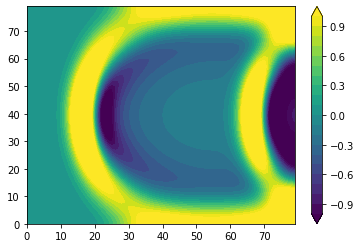

In [17]:
plt.contourf(h_lst[21], levels=np.linspace(-1, 1, 21), extend='both')
plt.colorbar()